<a href="https://colab.research.google.com/github/babaroscopy/colab/blob/main/Recognizing_AI_vs_Original_interior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Extract the zip file into a specific directory
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        # Unzip the file to a desired folder in Colab (e.g., '/content/images')
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/images')  # You can change the path if needed

# List the contents of the extracted directory to verify everything was unzipped
os.listdir('/content/images')


Saving OR_Interior.zip to OR_Interior.zip
Saving AI_Interior.zip to AI_Interior.zip


['AI_Interior', 'OR_Interior']

<ipython-input-14-419f4a19e66f>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 116 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - accuracy: 0.6383 - loss: 0.6953 - val_accuracy: 0.7500 - val_loss: 0.4327 - learning_rate: 0.0010
Epoch 2/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7500 - loss: 0.4743

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 395ms/step - accuracy: 0.7500 - loss: 0.4743 - val_accuracy: 0.9231 - val_loss: 0.3619 - learning_rate: 8.9125e-04
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8320 - loss: 0.3154 - learning_rate: 7.9433e-04
Epoch 4/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9375 - loss: 0.1289

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9375 - loss: 0.1289 - val_accuracy: 0.8125 - val_loss: 0.3878 - learning_rate: 7.0795e-04
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9292 - loss: 0.1971 - val_accuracy: 1.0000 - val_loss: 0.0993 - learning_rate: 6.3096e-04
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9375 - loss: 0.1705 - learning_rate: 5.6234e-04
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9351 - loss: 0.1423 - val_accuracy: 0.9375 - val_loss: 0.2115 - learning_rate: 5.0119e-04
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.1794 - val_accuracy: 1.0000 - val_loss: 0.1891 - learning_rate: 4.4668e-04
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9844 - loss: 0.0962 - learning_rate: 3.9811e-04
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0963 - val_accuracy: 0.9375 - val_loss: 0.1448 - learning_rate: 3.5481e-04
Epoch 11/50
7/7 ━━━━━━━

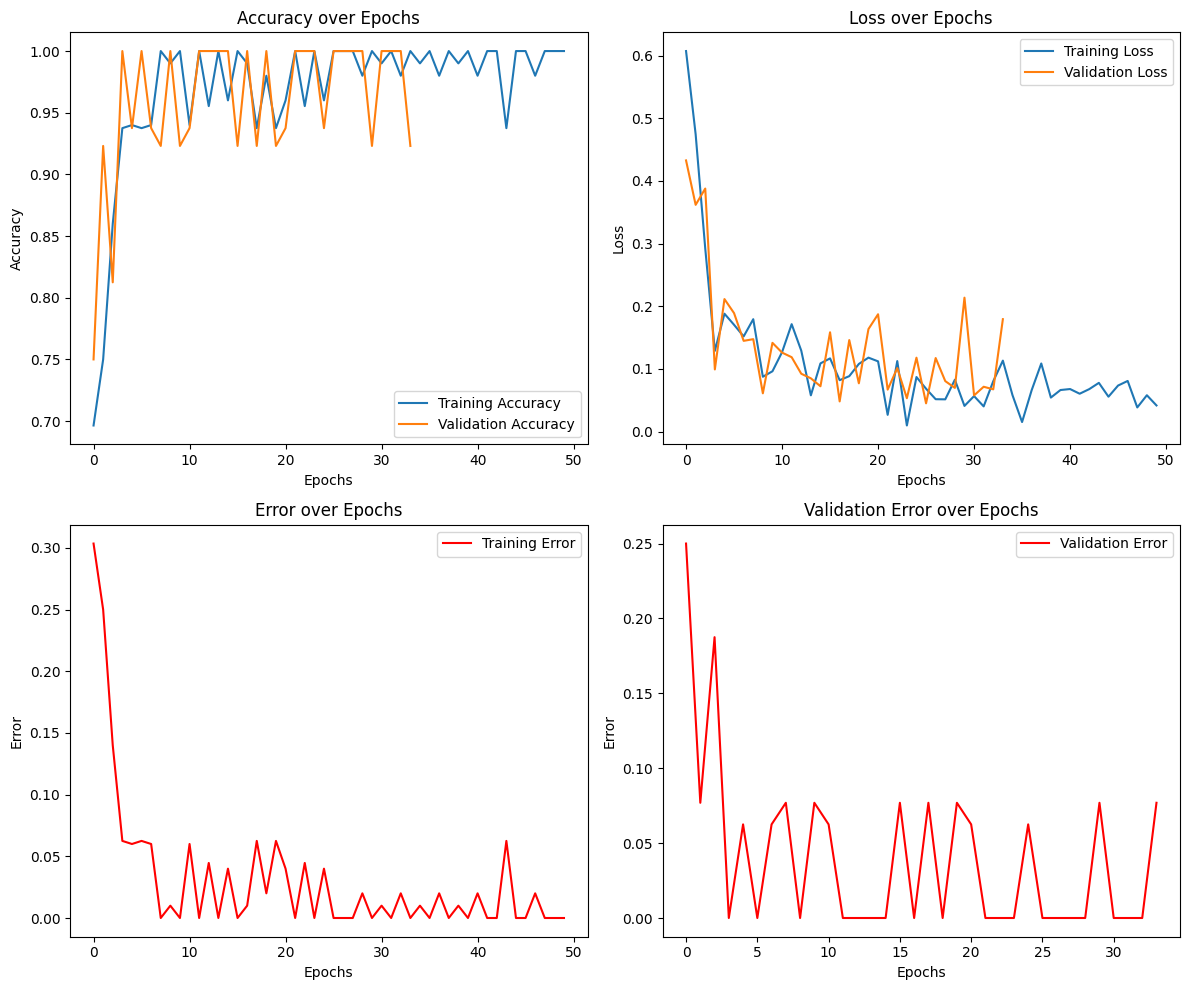

Found 145 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 1.0000 - loss: 0.0363
Test Accuracy: 1.00
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step


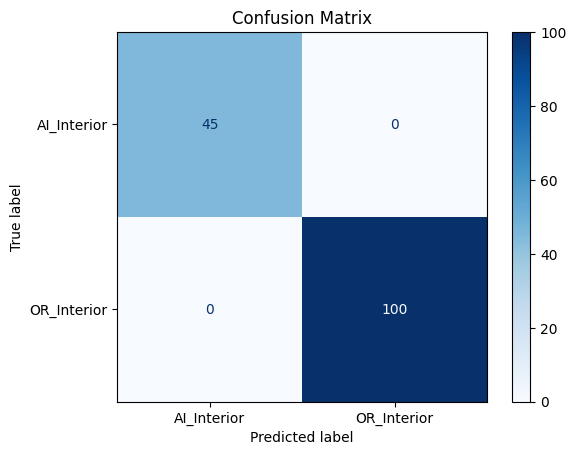

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load pre-trained MobileNet without the top layers (for transfer learning)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
base_model.trainable = False

# Build the custom model on top of MobileNet
model = models.Sequential([
    base_model,  # Adding pre-trained MobileNet as base
    layers.GlobalAveragePooling2D(),  # Global Average Pooling
    layers.Dense(128, activation='relu'),  # Dense layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- Data Augmentation and Preprocessing ---
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for validation
)

train_generator = datagen.flow_from_directory(
    '/content/images',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/images',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

# --- Callbacks ---
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# --- Train the Model ---
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint, lr_schedule]
)

# --- Log Accuracy and Error ---
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calculate Error
train_error = [1 - acc for acc in train_accuracy]
val_error = [1 - acc for acc in val_accuracy]

# --- Plot Logs ---
def plot_logs(train_accuracy, val_accuracy, train_error, val_error, train_loss, val_loss):
    plt.figure(figsize=(12, 10))

    # Accuracy plot
    plt.subplot(2, 2, 1)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    # Loss plot
    plt.subplot(2, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    # Train error plot
    plt.subplot(2, 2, 3)
    plt.plot(train_error, label='Training Error', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error over Epochs')
    plt.legend()

    # Validation error plot
    plt.subplot(2, 2, 4)
    plt.plot(val_error, label='Validation Error', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Validation Error over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_logs(train_accuracy, val_accuracy, train_error, val_error, train_loss, val_loss)

# --- Evaluate the Model ---
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/images',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# --- Confusion Matrix ---
def plot_confusion_matrix(model, generator):
    predictions = (model.predict(generator) > 0.5).astype(int)
    y_true = generator.classes
    cm = confusion_matrix(y_true, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(model, test_generator)


In [15]:
# prompt: generate architecture of following model, # Define the CNN model architecture
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load pre-trained MobileNet without the top layers (for transfer learning)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
base_model.trainable = False

# Build the custom model on top of MobileNet
model = models.Sequential([
    base_model,  # Adding pre-trained MobileNet as base
    layers.GlobalAveragePooling2D(),  # Global Average Pooling
    layers.Dense(128, activation='relu'),  # Dense layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

from tensorflow.keras.utils import plot_model

# Assuming 'model' is defined as in your previous code
# ... your model definition ...


plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
model.summary()

<ipython-input-15-263337809278>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 8, 8, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,360,193 (12.82 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [16]:
!pip install pillow


In [17]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 18.3 MB/s eta 0:00:00


<ipython-input-19-72a5d1285b4d>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


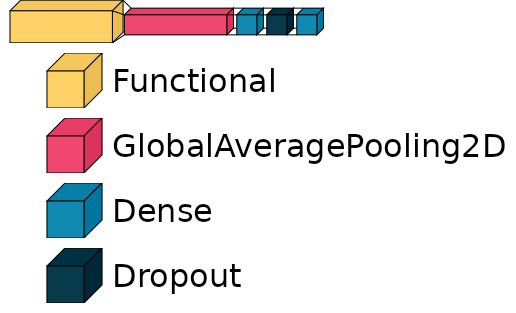

In [19]:
# Install visualkeras
!pip install visualkeras

import visualkeras
from PIL import ImageFont
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models

# Load pre-trained MobileNet model without the top layers (for transfer learning)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
base_model.trainable = False

# Build the custom model on top of MobileNet
model = models.Sequential([
    base_model,  # Adding pre-trained MobileNet as base
    layers.GlobalAveragePooling2D(),  # Global Average Pooling
    layers.Dense(128, activation='relu'),  # Dense layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Use a system-installed font like DejaVu Sans
font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 32)

# Visualize the model
visualkeras.layered_view(model, legend=True, font=font)


In [20]:

import tensorflow as tf
from tensorflow.keras import layers, models, Input
import visualkeras
from PIL import ImageFont
import matplotlib.pyplot as plt


# Use a system-installed font
font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 32)

# Define the text_callable function to annotate layers with output shapes and names
def text_callable(layer_index, layer):
    # Every other piece of text is drawn above the layer, the first one below
    above = bool(layer_index % 2)

    # Get the output shape of the layer using layer.output.shape
    output_shape = [x for x in list(layer.output.shape) if x is not None]

    # If the output shape is a list of tuples, we only take the first one
    if isinstance(output_shape[0], tuple):
        output_shape = list(output_shape[0])
        output_shape = [x for x in output_shape if x is not None]

    # Variable to store text which will be drawn
    output_shape_txt = ""

    # Create a string representation of the output shape
    for ii in range(len(output_shape)):
        output_shape_txt += str(output_shape[ii])
        if ii < len(output_shape) - 2:  # Add an x between dimensions, e.g. 3x3
            output_shape_txt += "x"
        if ii == len(output_shape) - 2:  # Add a newline between the last two dimensions, e.g. 3x3 \n 64
            output_shape_txt += "\n"

    # Add the name of the layer to the text, as a new line
    output_shape_txt += f"\n{layer.name}"

    # Return the text value and if it should be drawn above the layer
    return output_shape_txt, above

# Create the model plot
fig = plt.figure(figsize=(12, 8))  # Adjust this to increase the width

# Visualize the model with the text_callable function
visualkeras.layered_view(model, legend=True, font=font, text_callable=text_callable)

# Save or show the plot
plt.savefig("/content/model_architecture_with_text.png", dpi=300)  # Adjust DPI to improve quality
plt.show()


<Figure size 1200x800 with 0 Axes>

**CNN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 116 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 501ms/step - accuracy: 0.6121 - loss: 2.0024 - val_accuracy: 0.3750 - val_loss: 0.7082
Epoch 2/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4375 - loss: 0.7057

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4375 - loss: 0.7057 - val_accuracy: 0.7692 - val_loss: 0.6756
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6232 - loss: 0.6639
Epoch 4/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6250 - loss: 0.7559

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6250 - loss: 0.7559 - val_accuracy: 0.5625 - val_loss: 0.8197
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7094 - loss: 0.6200 - val_accuracy: 0.8462 - val_loss: 0.4819
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5625 - loss: 0.6634 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7119 - loss: 0.6110 - val_accuracy: 0.6250 - val_loss: 0.6544
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6250 - loss: 0.6931 - val_accuracy: 0.7692 - val_loss: 0.5464
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6839 - loss: 0.6224
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8750 - loss: 0.5236 - val_accuracy: 0.6875 - val_loss: 0.6124
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7091 - loss: 0.5706 - val_accuracy: 0.7692 - val_loss: 0.4708
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.6884 
Epoch 13/

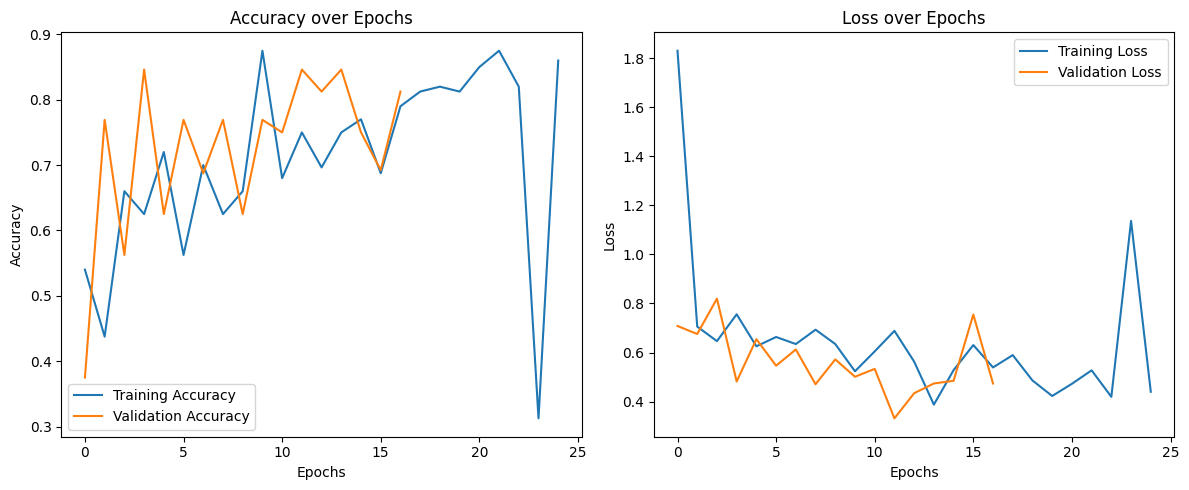

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step


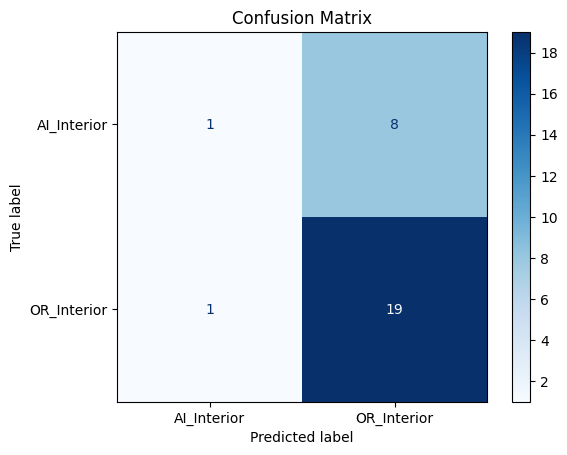

Model saved as 'model.h5'


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import visualkeras

# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Directory with images directly in `AL` and `ORI` subfolders
data_dir = '/content/images'

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model using validation data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {test_accuracy:.2f}")

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Confusion matrix
def plot_confusion_matrix(model, generator):
    predictions = (model.predict(generator) > 0.5).astype(int)
    y_true = generator.classes
    cm = confusion_matrix(y_true, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(model, validation_generator)

# Save the model
model.save('model.h5')
print("Model saved as 'model.h5'")

# Visualize the model
visualkeras.layered_view(model, legend=True)
plt.show()


**END**